# Post Test - Madaline

Madaline (Many Adaptive Linear Neuron) merupakan sebuah arsitektur jaringan saraf tiruan yang tersusun dari sekumpulan Adaline. Berbeda dengan Adaline, Madaline merupakan sebuah jaringan multilayer yang terdiri dari input, hidden, dan output layer.

Pada praktikum sebelumnya, kita sudah menerapkan Madaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Madaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Madaline untuk kasus regresi polinomial orde 2.
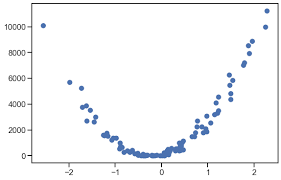



## Kode (jangan diubah)

Fungsi Training Madaline

In [106]:
import numpy as np

def madaline_fit(train_data,train_target,alpha=0.1,max_epoch=-1):
  w = np.random.random((2,2))
  v = np.array([0.5,0.5])
  b = np.random.random(2)
  b = np.append(b,0.5)
  epoch = 0

  aktivasi_linstep = np.vectorize(linstep)
  aktivasi_relu = np.vectorize(relu)
  weight_updated = True

  while weight_updated == True and epoch < max_epoch:
    weight_updated = False

    # Lengkapi kode di bawah ini
    for data,target in zip(train_data,train_target):
      z_in = np.dot(data, w)
      z_in = z_in + b[:-1]
      z = aktivasi_relu(z_in)
      y_in = np.dot(z, v) + b[-1]
      y = aktivasi_linstep(y_in)
      error = target - y

      if abs(error) > 1e-3:
        weight_updated = True
        index = np.where((z_in>0) | (z_in<0))[0]
        b[index] += alpha * error
        w[:, index] += alpha * error

    epoch = epoch +1
  return (w,v,b,epoch)

## Masalah

Diketahui terdapat persamaan kuadrat yang memetakan x ke f(x). Teman-teman diharapkan bisa menerapkan Madaline untuk menyelesaikan permasalahan polinomial berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi relu dengan nama relu() dan linstep dengan nama linstep().
2.   Gunakan fungsi Relu untuk hidden layer dan linstep pada output layer.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [107]:
# pada x(fitur), indeks kedua memiliki nilai yang sama seperti indeks pertama
# contoh: f(x,y) = ax^2 + by^2 + cxy + dx + ey + f
# x=y
# f(x,y) = 1x^2 + 2y^2 + 3xy + 4x + 5y + 6
# f(x,y) = 6x^2 + 9x + 6

z = np.array([[-5,-5],[-4.5,-4.5],[-4,-4],[-3.5,-3.5],[-3,-3],[-2.5,-2.5],[-2,-2],
              [-1.5,-1.5],[-1,-1],[-0.5,-0.5],[0,0],[0.5,0.5],[1,1],[1.5,1.5],[2,2],
              [2.5,2.5],[3,3],[3.5,3.5],[4,4],[4.5,4.5],[5,5]])

fx_values = []

for x, y in z:
    fx = 4*(x**2) + 4*(y**2) + 5*x*y + 1*x + 4*y + 8
    fx_values.append(fx)

fx_values = np.array(fx_values)
print(fx_values)

[308.   248.75 196.   149.75 110.    76.75  50.    29.75  16.     8.75
   8.    13.75  26.    44.75  70.   101.75 140.   184.75 236.   293.75
 358.  ]


Jangan ubah kode visualisasi fungsi kuadrat

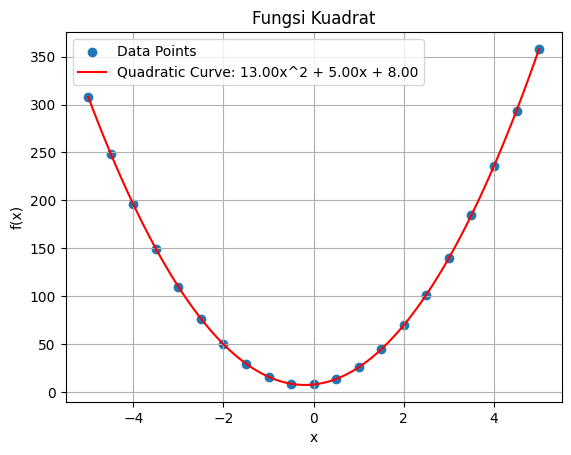

In [108]:
import matplotlib.pyplot as plt

# Fit a quadratic curve to the data
coefficients = np.polyfit(z[:,0], fx_values, 2)
a, b, c = coefficients

# Generate x values for the curve
x_curve = np.linspace(-5, 5, 100)
# Calculate corresponding y values using the quadratic equation
y_curve = a * x_curve**2 + b * x_curve + c

# Plot the data points and the fitted quadratic curve
plt.scatter(z[:,0], fx_values, label='Data Points')
plt.plot(x_curve, y_curve, label=f'Quadratic Curve: {a:.2f}x^2 + {b:.2f}x + {c:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fungsi Kuadrat')
plt.legend()
plt.grid(True)
plt.show()

Buat fungsi aktivasi linear bernama linstep()

In [109]:
# Diisi praktikan
def linstep(x):
    return x

Buat fungsi aktivasi relu bernama relu()

In [132]:
# Diisi praktikan
def relu(x):
    if (x<0):
        y = np.minimum(0, x)
        return -1 * y
    else:
        return max(0, x)

Buat fungsi pengujian bernama madaline_predict()

In [133]:
# Clue: z menggunakan aktivasi relu dan y menggunakan aktivasi linstep

def madaline_predict(w,v,b,test_data):
  # Dilengkapi praktikan
  aktivasi_linstep = np.vectorize(linstep)
  aktivasi_relu = np.vectorize(relu)

  z_in = np.dot(test_data, w)
  z_in += b[:-1]
  z = aktivasi_relu(z_in)

  y_in = np.dot(z, v) + b[-1]
  y = aktivasi_linstep(y_in)

  return y

Uji dengan x_test

In [134]:
# Isi parameter max_epoch dan alpha dan analisis hasilnya oleh praktikan

x_test = z

(w,v,b,epoch) = madaline_fit(z, fx_values, alpha=0.001, max_epoch=10000)
output = madaline_predict(w,v,b,x_test)

print('\nOutput:', output)
print('Epoch:', epoch)


Output: [216.79589194 192.81257337 168.82925481 144.84593625 120.86261769
  96.87929913  72.89598057  48.91266201  24.92934345   0.94602489
  24.03729367  48.02061223  72.00393079  95.98724935 119.97056792
 143.95388648 167.93720504 191.9205236  215.90384216 239.88716072
 263.87047928]
Epoch: 10000


Jangan ubah kode visualisasi hasil regresi

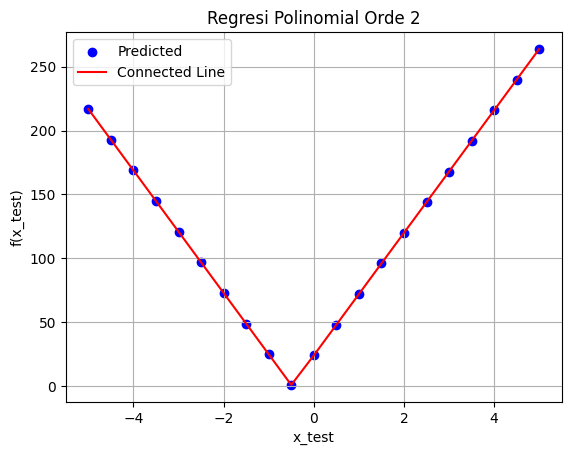

In [135]:
# Extract the first feature from x_test
x_test_first_feature = x_test[:, 0]

# Sort the points based on the first feature
sorted_indices = np.argsort(x_test_first_feature)
sorted_x_test_first_feature = x_test_first_feature[sorted_indices]
sorted_output = output[sorted_indices]

# Create a scatter plot
plt.scatter(x_test_first_feature, output, label='Predicted', color='blue')

# Plot a line connecting the sorted points
plt.plot(sorted_x_test_first_feature, sorted_output, color='red', label='Connected Line')

plt.xlabel('x_test')
plt.ylabel('f(x_test)')
plt.title('Regresi Polinomial Orde 2')
plt.legend()
plt.grid(True)
plt.show()

Jangan ubah kode visualisasi perbandingan nilai true dengan hasil prediksi

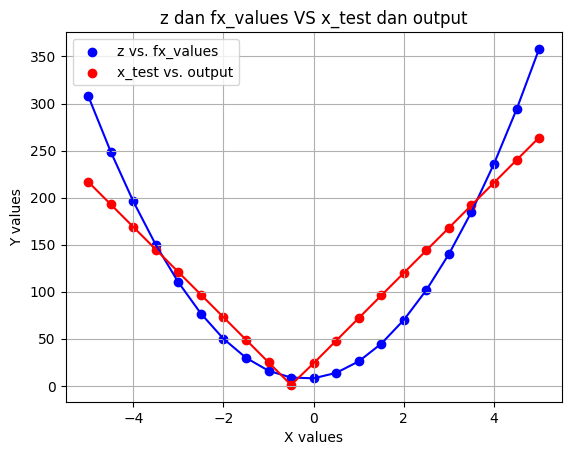

In [136]:
import matplotlib.pyplot as plt

# Assuming z, fx_values, x_test, and output are defined as mentioned in your question

# Create a scatter plot for z vs. fx_values
plt.scatter(z[:, 0], fx_values, label='z vs. fx_values', color='blue')

# Create a scatter plot for x_test vs. output
plt.scatter(x_test[:, 0], output, label='x_test vs. output', color='red')

# Plot lines connecting the dots for z vs. fx_valuesaktivasi_linstep(y_in)
plt.plot(z[:, 0], fx_values, linestyle='-', color='blue')

# Plot lines connecting the dots for x_test vs. output
plt.plot(x_test[:, 0], output, linestyle='-', color='red')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('z dan fx_values VS x_test dan output')
plt.legend()
plt.grid(True)
plt.show()

## Hyperparameter Tuning

In [124]:
# Scoring: menggunakan root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

# RMSE Calculation function
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [137]:
# Mendefinisikan data aktual menggunakan reference linear model
def actual_model(x):
    return 13*(x**2) + 5*x + 8

fx_test = [actual_model(x[0]) for x in x_test]
print("fx_test: ", fx_test)

fx_test:  [308.0, 248.75, 196.0, 149.75, 110.0, 76.75, 50.0, 29.75, 16.0, 8.75, 8.0, 13.75, 26.0, 44.75, 70.0, 101.75, 140.0, 184.75, 236.0, 293.75, 358.0]


In [138]:
learning_rate_grid = [0.5, 0.1, 0.01, 0.001, 0.005, 0.002]

In [139]:
import itertools

grid_search_results = []

for learning_rate in learning_rate_grid:
    print(f"\nTraining with learning_rate={learning_rate}")
    
    w, v, b, epoch = madaline_fit(z, fx_values, alpha=learning_rate, max_epoch=10000)
    
    predictions = madaline_predict(w,v,b,x_test)
    
    rmse = calculate_rmse(fx_test, predictions)
    
    grid_search_results.append({
        'learning_rate': learning_rate,
        'rmse': rmse,
        'epochs': epoch
    })

sorted_results = sorted(grid_search_results, key=lambda x: x['rmse'])

best_result = sorted_results[0]
print("\nBest Result:")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"RMSE: {best_result['rmse']}")
print(f"Epochs: {best_result['epochs']}")


Training with learning_rate=0.5


/tmp/ipykernel_9629/1063539727.py:20: RuntimeWarning: invalid value encountered in add
  z_in = z_in + b[:-1]
/home/sobaqov/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in relu (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_9629/3004428167.py:9: RuntimeWarning: invalid value encountered in add
  z_in += b[:-1]


OverflowError: cannot convert float infinity to integer

## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi kuadrat yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Madaline hingga bisa melakukan regresi polinomial orde 2?

1. Fungsi kuadrat yang sesuai adalah $ 13x^2 + 5x + 8$
2. Optimasi dari hyperparameter yang digunakan adalah dengan menggunakan grid search dengan learning rate sebagai grid search space. Learning rate yang digunakan berkisar dari 0.1 hingga 1e-3 dengan max_epoch yang cukup tinggi bernilai 1000. Untuk mengukur performansi parameter yang digunakan, digunakan error measurement berupa RMSE.

Selain itu, optimasi juga dilakukan pada fungsi aktivasi RELu yang digunakan pada hidden layer. RELu yang digunakan untuk mensimulasikan regresi polinomial kuadrat adalah dengan mengembalikan nilai dari y_out aktual untuk x<0. Dengan demikian, RELu akan mengembalikan nilai prediksi aktual yang bernilai positif untuk x<0.